## Classificando texturas em imagens com o Support Vector Machines
***

Classificação de Textura com **Haralick features**.

Os Haralick features são usados para descrever a textura de uma imagem. A textura refere-se à aparência, consistência ou "sensação" de uma superfície. Exemplos de texturas incluem "áspero" versus "macio". 

As aplicações potenciais das Haralick features incluem determinar se uma estrada é pavimentada versus cascalho.

As Haralick features são calculadas usando a Matriz de Co-ocorrência de Nível de Cinza (GLCM). Esta matriz caracteriza a textura, registrando a frequência com que os pares de pixels adjacentes com valores específicos ocorrem em uma imagem.

***

In [1]:
# Imports
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
import mahotas
import glob
import cv2


def show(img, title=""):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.title(title, fontdict={"fontsize": 100})
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [2]:
# Inicializa a matriz de dados e a lista de labels
data = []
labels = []

In [3]:
# Loop sobre o dataset de imagens de treino
for imagePath in glob.glob("imagens/dataset02/training" + "/*.png"):
    # Carrega a imagem, converte em escala de cinza e extrai o nome da textura do nome do arquivo
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    texture = imagePath[imagePath.rfind("/") + 1:].split("_")[0]

    # Extrai as características da textura de Haralick em 4 direções, depois calcula a média de cada direção
    features = mahotas.features.haralick(image).mean(axis=0)

    # Atualiza dados e labels
    data.append(features)
    labels.append(texture)

In [4]:
# Treinando a modelo Classificador
model = LinearSVC(C=10.0, random_state=42)

In [5]:
# Classificando...
model.fit(data, labels)

/home/victorhad/.local/lib/python3.5/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
     verbose=0)

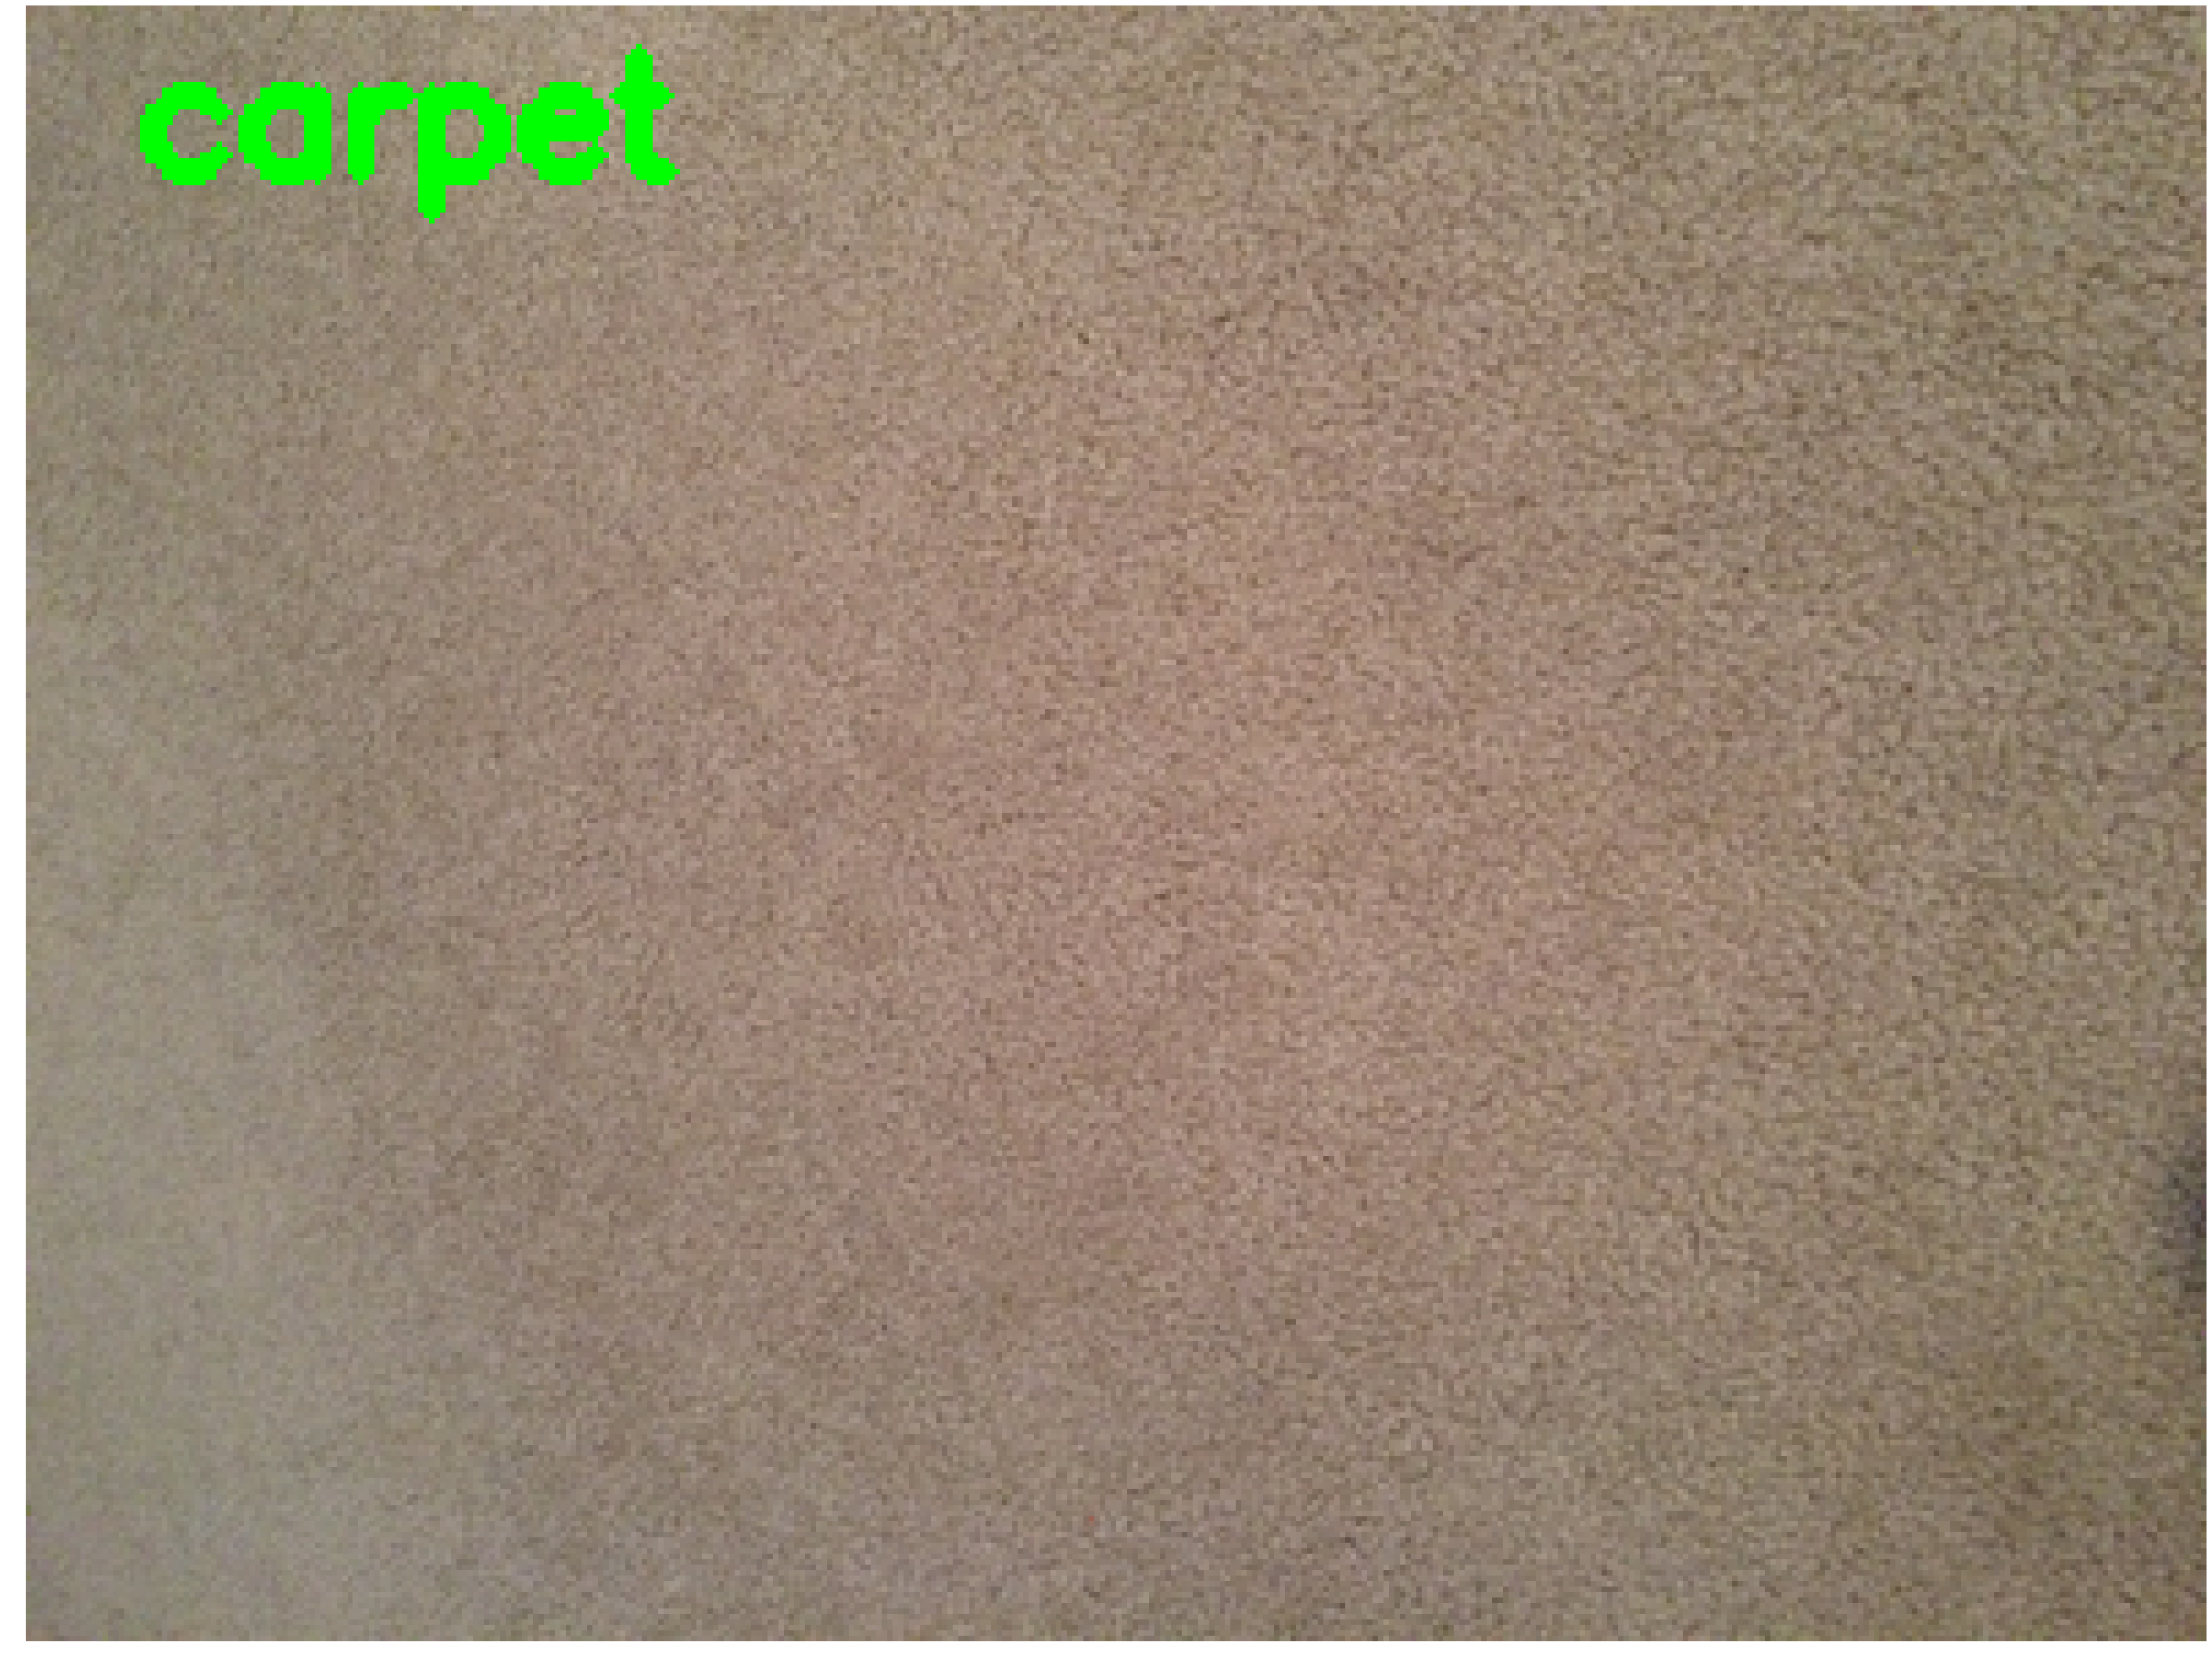

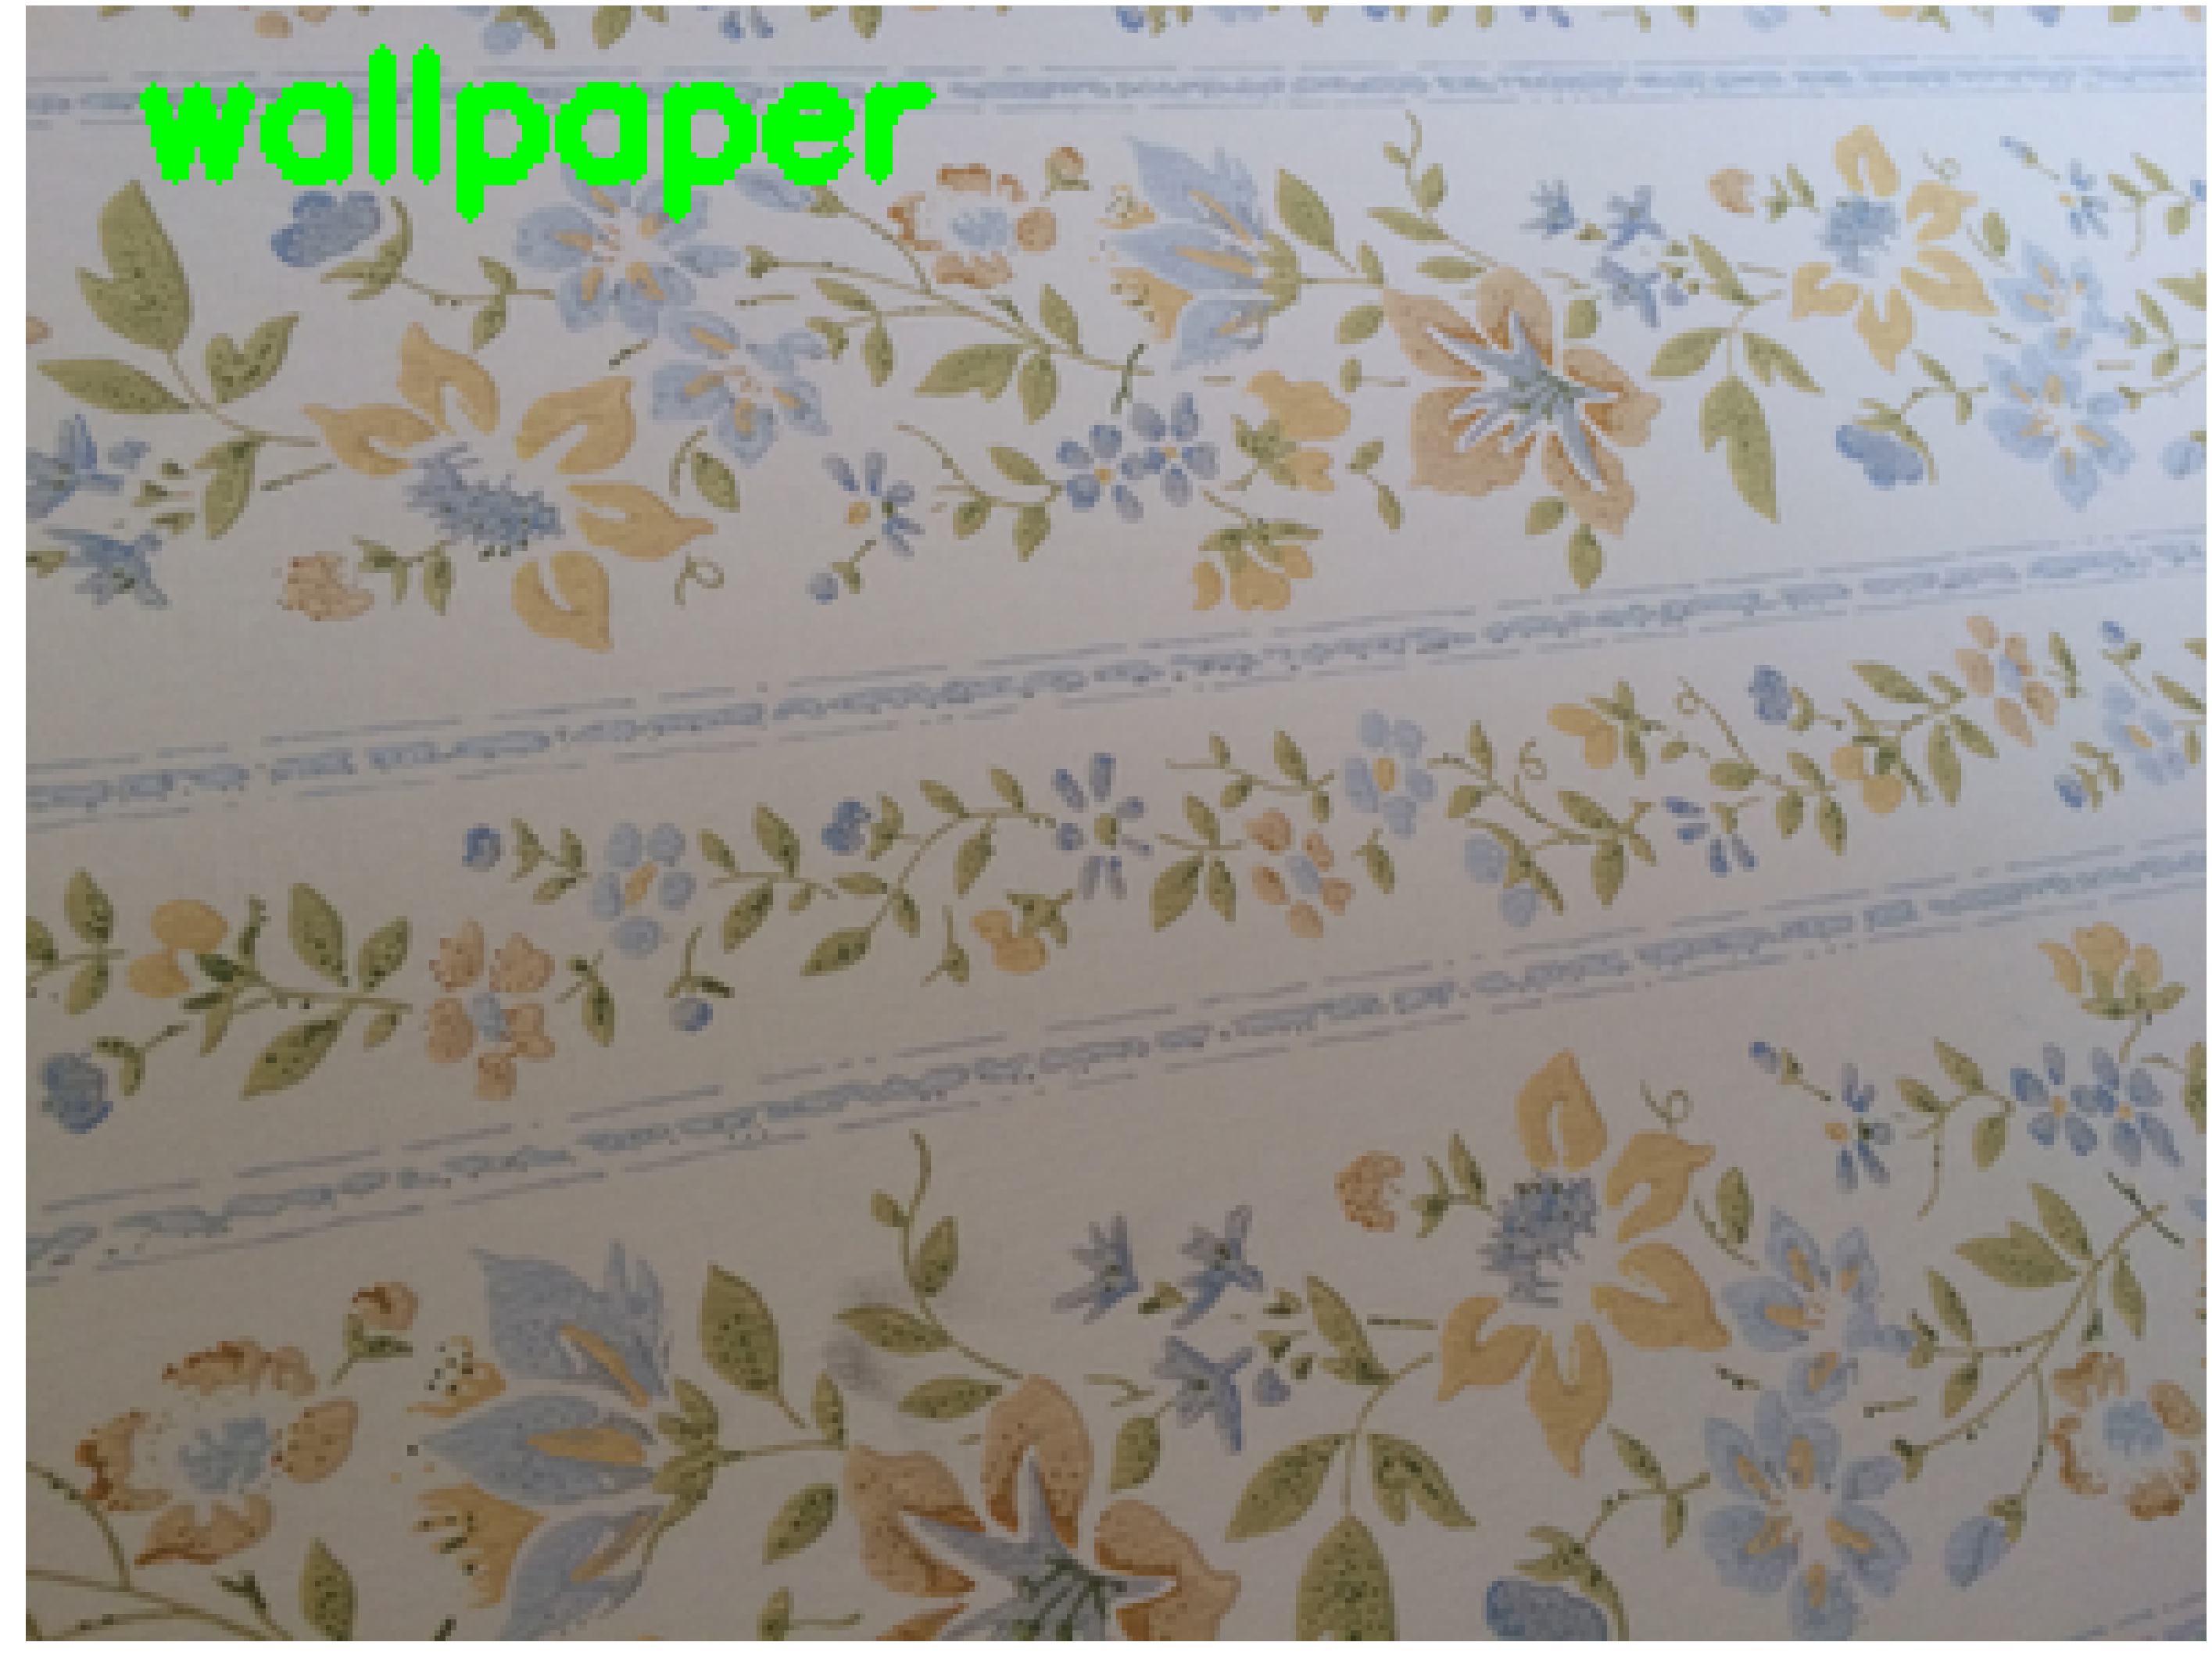

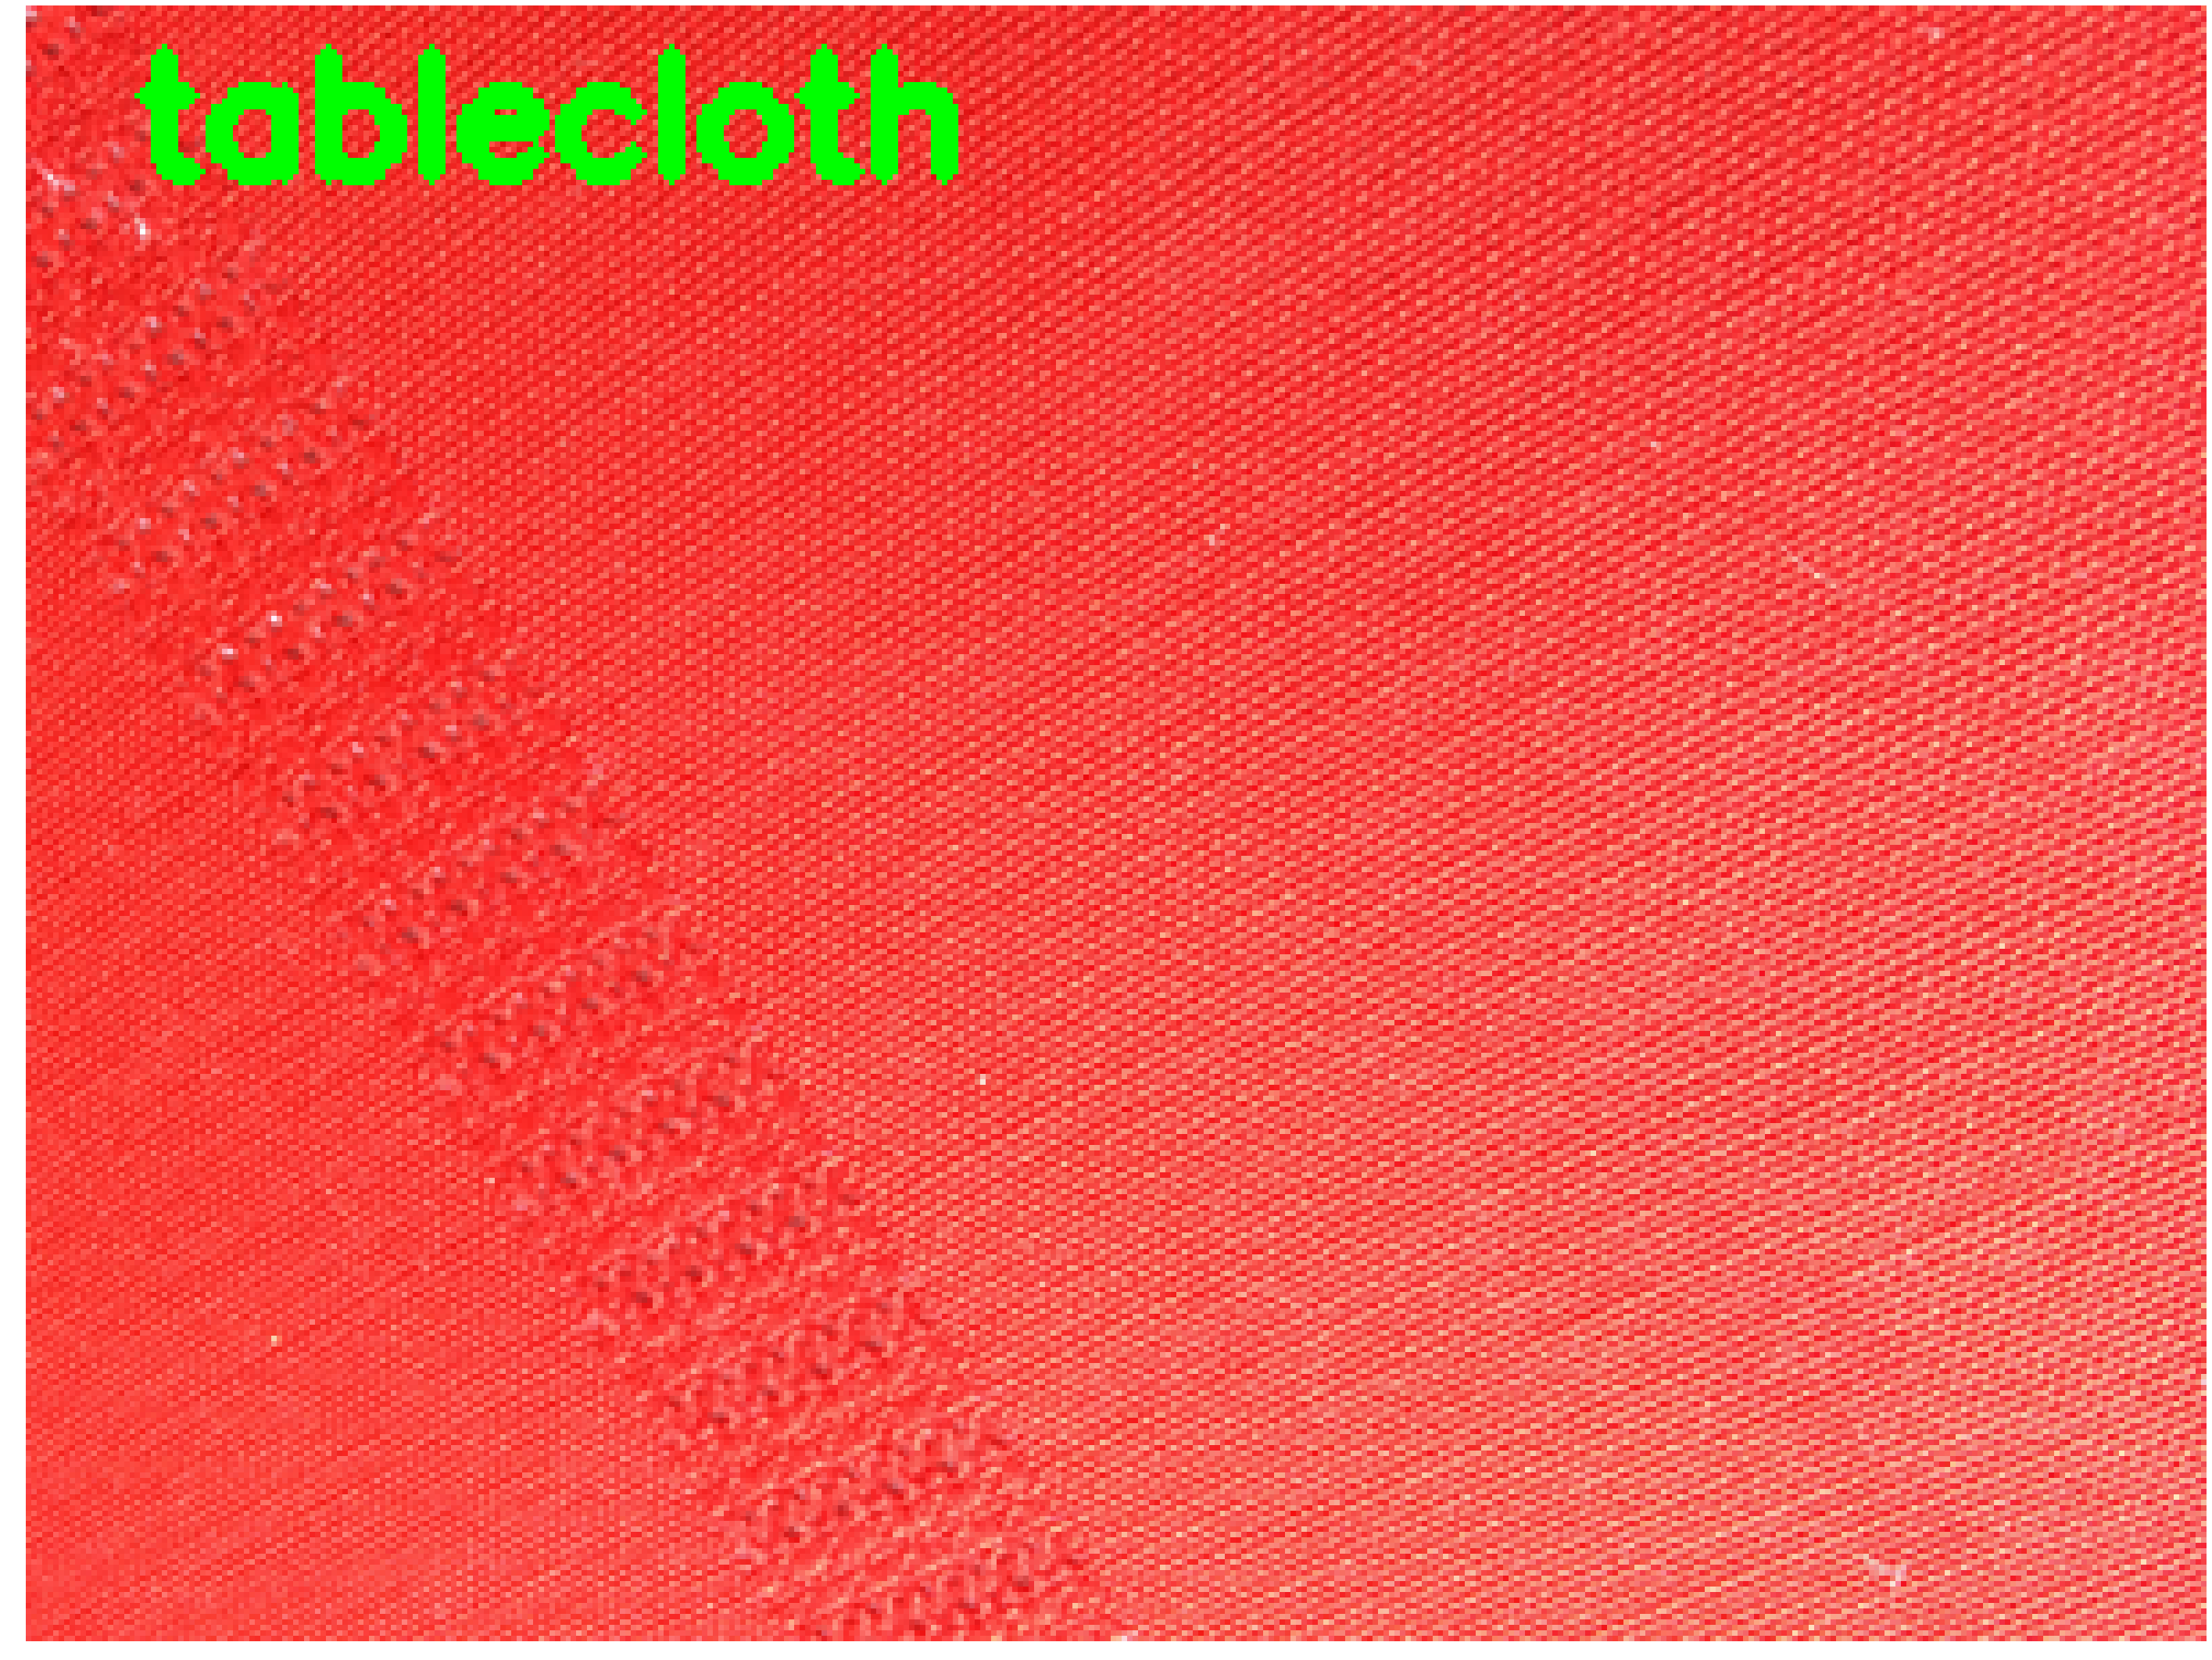

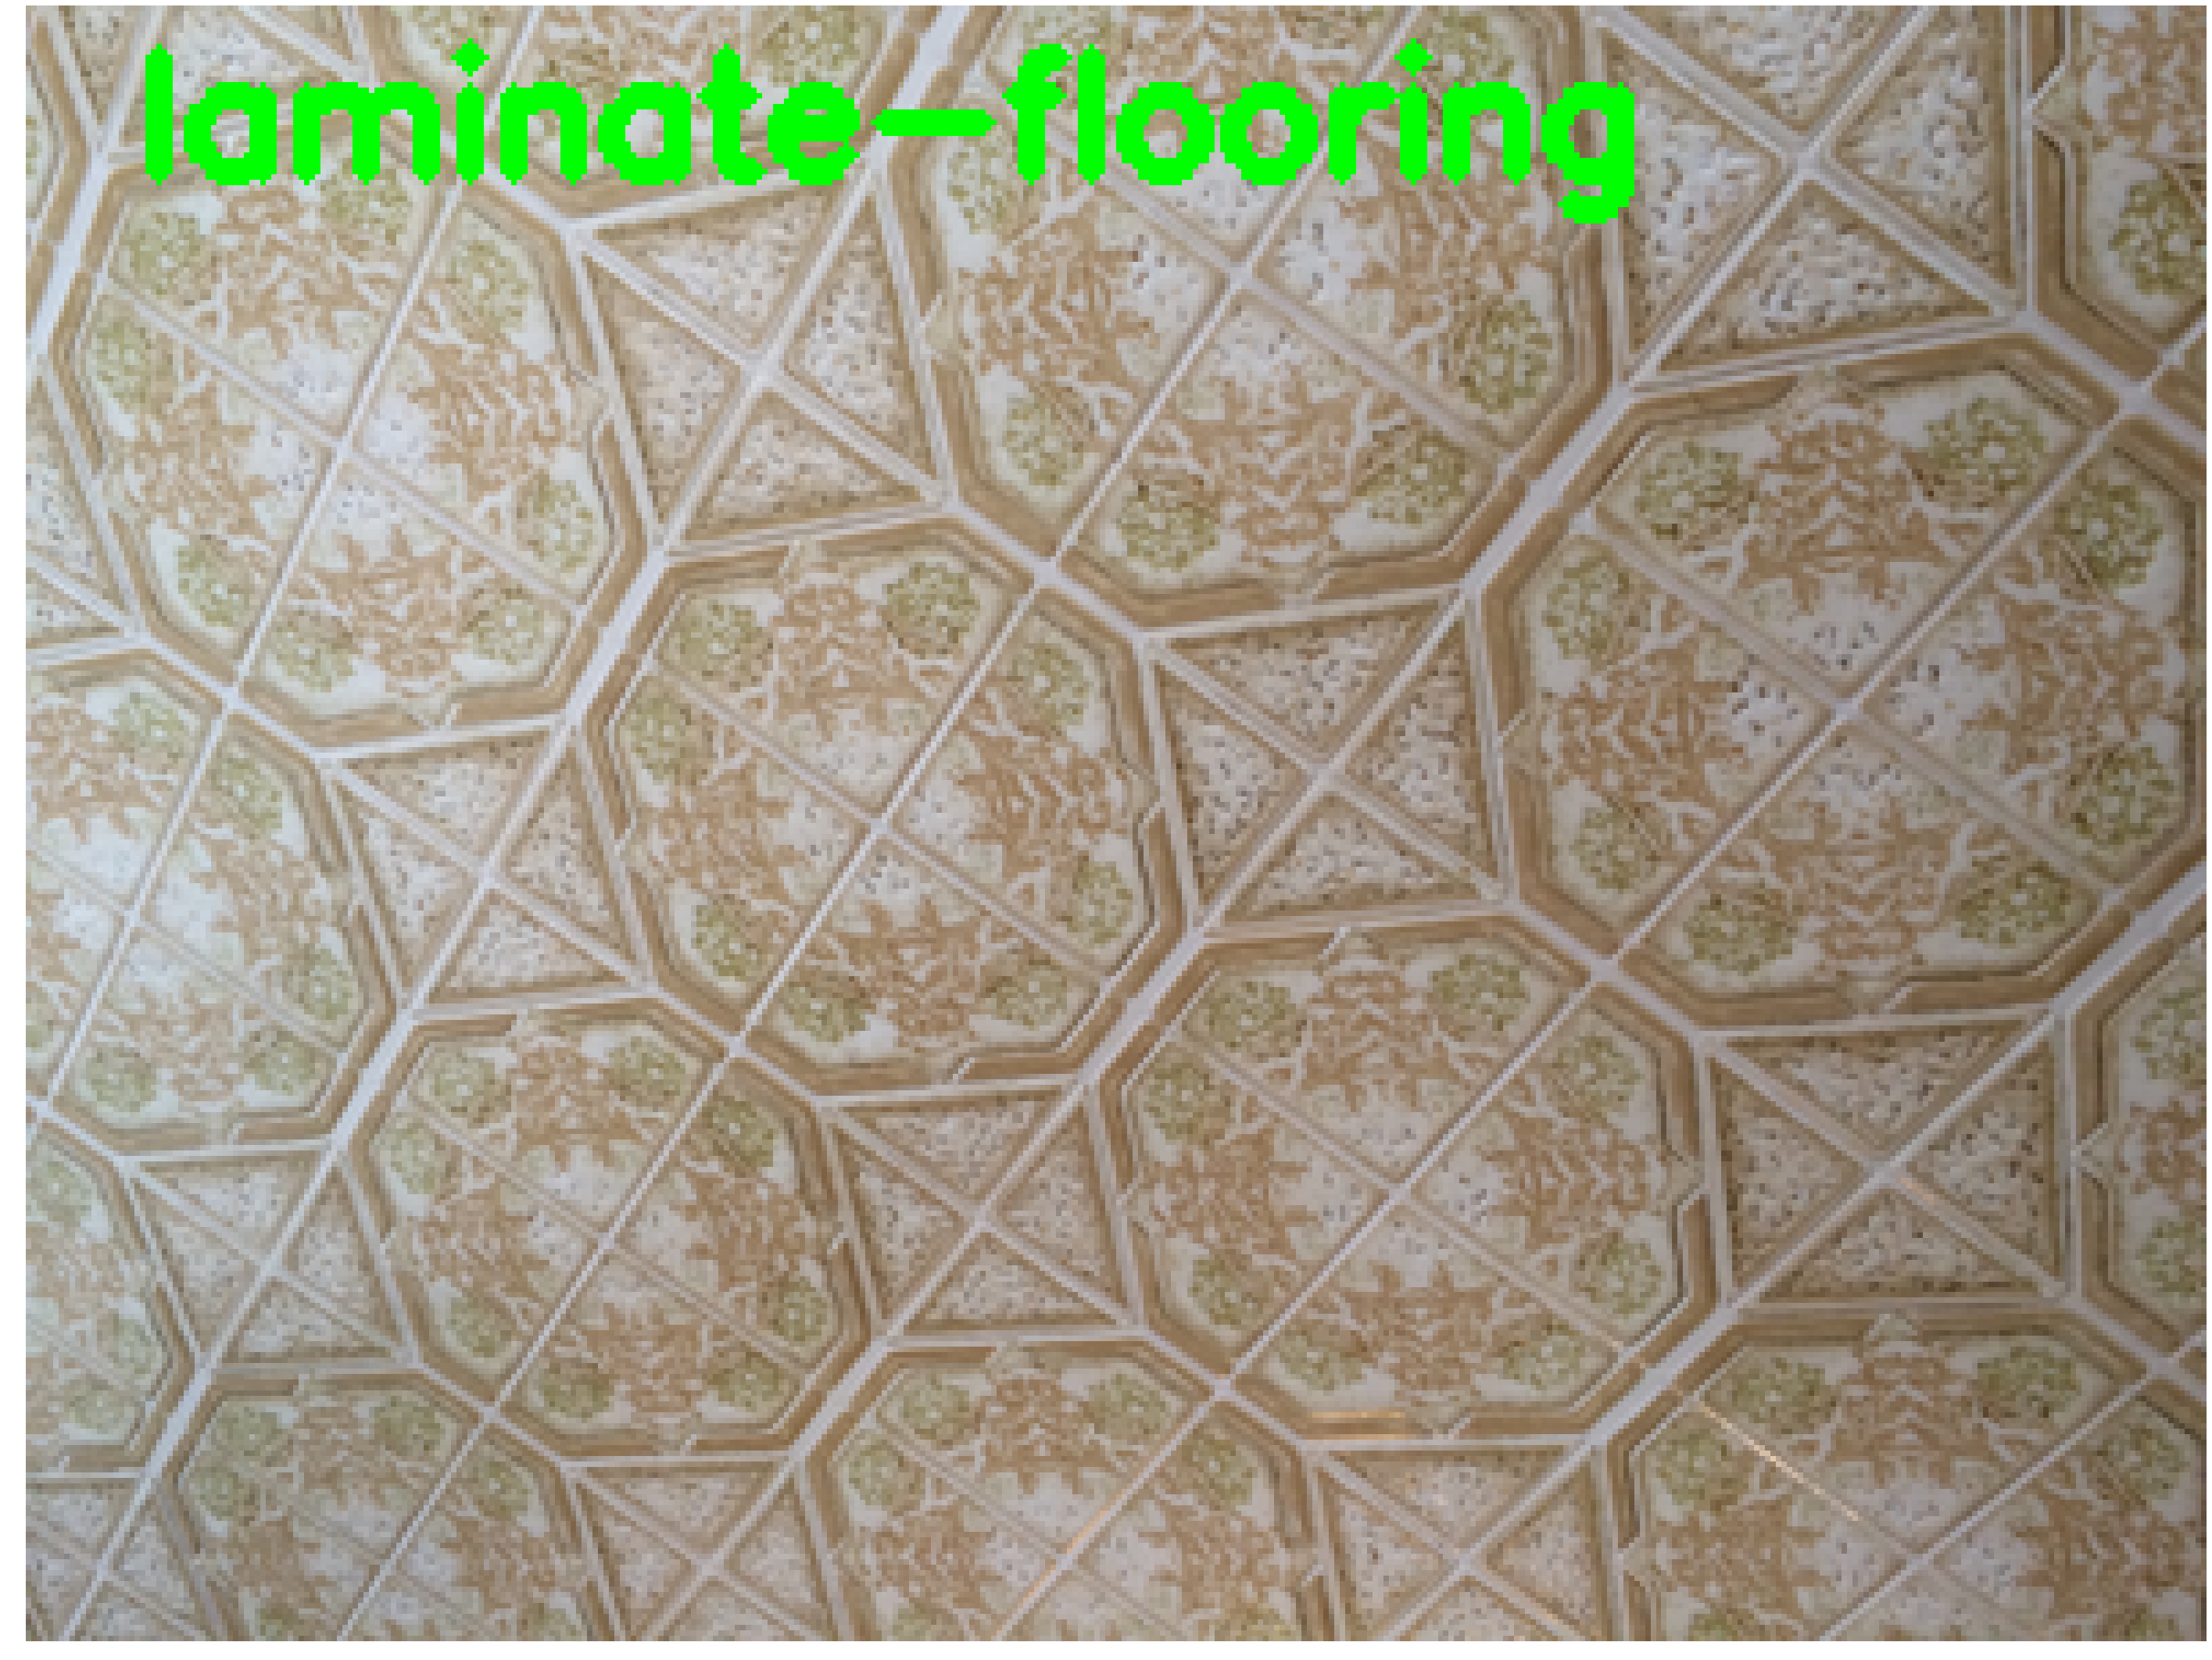

In [6]:
# Loop pelas imagens de teste
for imagePath in glob.glob("imagens/dataset02/testing" + "/*.png"):
    # Carrega a imagem, converte em escala de cinza e extrai a textura Haralick da imagem de teste
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features = mahotas.features.haralick(gray).mean(axis=0)

    # Classifica a imagem de teste
    pred = model.predict(features.reshape(1, -1))[0]
    cv2.putText(image, pred, (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 3)

    # Output
    show(image)